In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ARIMA import rmse,mape,UStatistic
import time
from statsmodels.tsa.arima.model import ARIMA

In [4]:
dataset = pd.read_csv('./PJME_hourly.csv')
dataset['Datetime'] = pd.to_datetime(dataset["Datetime"], format='%Y-%m-%d %H:%M:%S')
dataset.rename(columns={'PJME_MW': 'demand'}, inplace=True)

days2predict = 48
train_size = int(len(dataset["demand"]) - days2predict)
train = dataset[:train_size].demand
test = dataset[train_size:].demand
train.head()

0    26498.0
1    25147.0
2    24574.0
3    24393.0
4    24860.0
Name: demand, dtype: float64

In [32]:
Error_df = pd.DataFrame(columns = ["Name","RMSE","SMAPE","Theils U"])

begin=time.time()


config_arima = (14,1,4) # P=14, D=1 e Q=4 -> (p,d,q)
arima_train = ARIMA(train,order=config_arima).fit()
arima_test = ARIMA(test,order=config_arima).fit(arima_train.params)
y_hat = arima_train.forecast(len(test))

print(time.time() - begin)

/home/cesar/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


463.9061872959137


/home/cesar/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


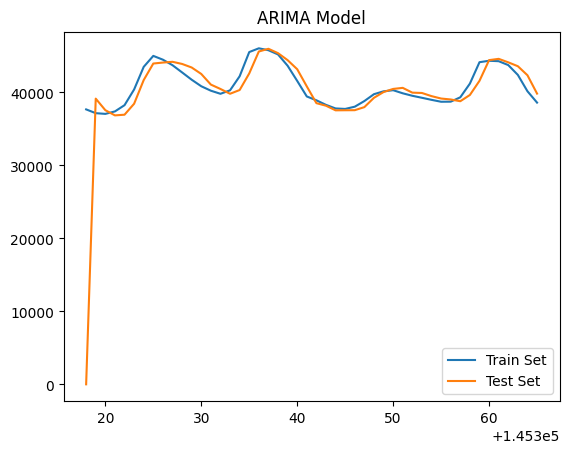

In [33]:
plt.figure()
plt.plot(test)
plt.plot(arima_test.predict(typ='levels'))
plt.title('ARIMA Model')
plt.legend(['Train Set','Test Set','ARIMA Model'])

In [34]:
MAPE = mape(test.to_numpy(),y_hat.to_numpy())
RMSE = rmse(test.to_numpy(),y_hat.to_numpy())
U = UStatistic(test.to_numpy(),y_hat.to_numpy())
dictResult= {   'Name': 'ARMA {},{},{}'.format(config_arima[0],config_arima[1],config_arima[2]),
                'RMSE': RMSE,
                'SMAPE': MAPE,
                'Theils U': U,
                }
Error_df = Error_df.append(dictResult,ignore_index=True)
Error_df.head()
# 'RMSE': '3025.9366', 'SMAPE': '6.73%'

/tmp/ipykernel_284409/2160134833.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Error_df = Error_df.append(dictResult,ignore_index=True)


,Name,RMSE,SMAPE,Theils U
0,"ARMA 14,1,4",2177.5289,4.53%,1.750482
